In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import random

%matplotlib inline

device = torch.device("cpu") #torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# tratamento da seed - pytorch
def set_seed(seed: int, deterministic_torch: bool = True):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo
    if torch is not None:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  #multi-GPU
        if deterministic_torch:
            torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False

set_seed(25)

In [3]:
df = pd.read_csv("../NewGen/train_split_prep7.csv")

In [4]:
df.head()

,original_shape_SurfaceVolumeRatio,original_firstorder_Energy,original_firstorder_TotalEnergy,original_gldm_SmallDependenceEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_ZoneVariance,wavelet-LHL_ngtdm_Coarseness,wavelet-LHH_gldm_DependenceEntropy,wavelet-LHH_gldm_DependenceNonUniformity,wavelet-LHH_gldm_DependenceNonUniformityNormalized,...,lbp-3D-m2_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-3D-m2_glrlm_LongRunEmphasis,lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis,lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis,lbp-3D-m2_glrlm_RunLengthNonUniformityNormalized,lbp-3D-m2_glrlm_RunPercentage,lbp-3D-m2_glrlm_ShortRunEmphasis,lbp-3D-m2_glrlm_ShortRunHighGrayLevelEmphasis,lbp-3D-m2_glrlm_ShortRunLowGrayLevelEmphasis,Transition
0,0.646722,0.332975,0.332975,0.743187,0.165650,0.167302,0.577820,0.911714,0.259788,0.135969,...,0.528112,0.183653,0.183653,0.183653,0.633024,0.674847,0.658862,0.658862,0.658862,AD-AD
1,0.646124,0.279352,0.279352,0.605184,0.155027,0.152532,0.572456,1.000000,0.180384,0.024628,...,0.640870,0.216355,0.216355,0.216355,0.627178,0.663384,0.710960,0.710960,0.710960,AD-AD
2,0.142776,0.710948,0.710948,0.226206,0.453043,0.461957,0.154716,0.231668,0.715294,0.761206,...,0.132450,0.902781,0.902781,0.902781,0.098020,0.161192,0.249003,0.249003,0.249003,CN-CN
3,0.189767,0.634511,0.634511,0.164879,0.743082,0.748570,0.135693,0.124846,0.681030,0.818409,...,0.062202,0.667708,0.667708,0.667708,0.144705,0.201226,0.055939,0.055939,0.055939,MCI-MCI
4,0.464281,0.390720,0.390720,0.475275,0.233301,0.237776,0.410224,0.815456,0.342529,0.214382,...,0.390560,0.455996,0.455996,0.455996,0.414524,0.473195,0.514465,0.514465,0.514465,CN-CN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Columns: 101 entries, original_shape_SurfaceVolumeRatio to Transition
dtypes: float64(100), object(1)
memory usage: 192.7+ KB


Impute by mean the *Nan* values of *Age*

In [6]:
from sklearn.preprocessing import LabelEncoder

cols = ['Transition']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,original_shape_SurfaceVolumeRatio,original_firstorder_Energy,original_firstorder_TotalEnergy,original_gldm_SmallDependenceEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_ZoneVariance,wavelet-LHL_ngtdm_Coarseness,wavelet-LHH_gldm_DependenceEntropy,wavelet-LHH_gldm_DependenceNonUniformity,wavelet-LHH_gldm_DependenceNonUniformityNormalized,...,lbp-3D-m2_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-3D-m2_glrlm_LongRunEmphasis,lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis,lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis,lbp-3D-m2_glrlm_RunLengthNonUniformityNormalized,lbp-3D-m2_glrlm_RunPercentage,lbp-3D-m2_glrlm_ShortRunEmphasis,lbp-3D-m2_glrlm_ShortRunHighGrayLevelEmphasis,lbp-3D-m2_glrlm_ShortRunLowGrayLevelEmphasis,Transition
0,0.646722,0.332975,0.332975,0.743187,0.165650,0.167302,0.577820,0.911714,0.259788,0.135969,...,0.528112,0.183653,0.183653,0.183653,0.633024,0.674847,0.658862,0.658862,0.658862,0
1,0.646124,0.279352,0.279352,0.605184,0.155027,0.152532,0.572456,1.000000,0.180384,0.024628,...,0.640870,0.216355,0.216355,0.216355,0.627178,0.663384,0.710960,0.710960,0.710960,0
2,0.142776,0.710948,0.710948,0.226206,0.453043,0.461957,0.154716,0.231668,0.715294,0.761206,...,0.132450,0.902781,0.902781,0.902781,0.098020,0.161192,0.249003,0.249003,0.249003,1
3,0.189767,0.634511,0.634511,0.164879,0.743082,0.748570,0.135693,0.124846,0.681030,0.818409,...,0.062202,0.667708,0.667708,0.667708,0.144705,0.201226,0.055939,0.055939,0.055939,4
4,0.464281,0.390720,0.390720,0.475275,0.233301,0.237776,0.410224,0.815456,0.342529,0.214382,...,0.390560,0.455996,0.455996,0.455996,0.414524,0.473195,0.514465,0.514465,0.514465,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Columns: 101 entries, original_shape_SurfaceVolumeRatio to Transition
dtypes: float64(100), int64(1)
memory usage: 192.7 KB


In [8]:
# Separando variáveis
df_X = df.drop(columns=['Transition'])
df_y = df['Transition']

In [9]:
t_X = pd.DataFrame(df_X)
filename = "train_nn2.csv"
t_X.to_csv(filename, index=False, encoding='utf-8')

In [10]:
t_y = pd.DataFrame(df_y)
filename = "res_nn2.csv"
t_y.to_csv(filename, index=False, encoding='utf-8')

In [11]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor

# Classe personalizada para carregar o dataset a partir de arquivos CSV
class CSVDataset(Dataset):
    def __init__(self, path):
        # Lê o arquivo CSV que contém as features (entradas)
        df_X = pd.read_csv("train_nn2.csv", header=0)  # Carrega o arquivo de treino (features)
        
        # Lê o arquivo CSV que contém os rótulos (saídas/targets)
        df_y = pd.read_csv("res_nn2.csv", header=0)  # Carrega o arquivo de resultado
        
        # Converte os dados de features (entradas) para um array numpy
        self.X = df_X.values
        
        # Converte os dados de rótulos para um array numpy e ajusta os valores (subtrai 1)
        self.y = df_y.values[:, 0]  
        
        # Converte os dados de features para o tipo 'float64' (precisão para modelos de ML)
        self.X = self.X.astype('float32')
        
        # Converte os rótulos para tensores do PyTorch (com tipo 'long' para inteiros)
        self.y = torch.tensor(self.y, dtype=torch.long, device=device)
        
        # Imprime as dimensões e o tipo de dado dos arrays para debugging
        print(self.X.shape)  # Exibe a forma do array de features
        print(self.y.shape)  # Exibe a forma do array de rótulos
        print(self.X.ndim)   # Exibe o número de dimensões do array de features
        print(self.y.ndim)   # Exibe o número de dimensões do array de rótulos
        print(self.X.dtype)  # Exibe o tipo de dado dos features
        print(self.y.dtype)  # Exibe o tipo de dado dos rótulos
        
    # Método que retorna o número total de amostras no dataset
    def __len__(self):
        return len(self.X)  # Retorna o número de exemplos no dataset (tamanho de X)
    
    # Método que retorna uma amostra do dataset (um par [feature, rótulo]) dado um índice
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]  # Retorna a feature e o rótulo correspondente ao índice 'idx'
    
    # Método para dividir o dataset em subconjuntos de treino e teste
    def get_splits(self, n_test):
        test_size = round(n_test * len(self.X))  # Define o tamanho do conjunto de teste (com base na fração n_test)
        train_size = len(self.X) - test_size  # O restante dos dados será usado para treino
        return random_split(self, [train_size, test_size])  # Divide o dataset em treino e teste

# Função para preparar os dados, carregando o dataset e criando os DataLoaders
def prepare_data(df, n_test):
    dataset = CSVDataset(df)  # Cria uma instância do dataset a partir do arquivo CSV
    
    # Divide o dataset em treino e teste
    train, test = dataset.get_splits(n_test)
    
    # Cria DataLoader para o conjunto de treino (embaralha os dados e usa o batch_size igual ao tamanho do treino)
    train_dl = DataLoader(train, batch_size=len(train), shuffle=True)
    
    # Cria DataLoader para o conjunto de teste (embaralha os dados e usa o batch_size igual ao tamanho do teste)
    test_dl = DataLoader(test, batch_size=len(train), shuffle=True)
    
    # Retorna os DataLoaders para treino e teste
    return train_dl, test_dl


In [12]:
train_dl, test_dl = prepare_data(df, 0.20)

(244, 100)
torch.Size([244])
2
1
float32
torch.int64


In [13]:
from IPython.display import display

display()

In [14]:
display(df_y)

0      0
1      0
2      1
3      4
4      1
      ..
239    1
240    4
241    0
242    3
243    1
Name: Transition, Length: 244, dtype: int64

In [15]:
def visualize_dataset(train_dl, test_dl):
    print(f"Train size:{len(train_dl.dataset)}") 
    print(f"Test size:{len(test_dl.dataset)}")
    x, y = next(iter(train_dl))
    print(f"Shape tensor train data batch - input: {x.shape}, output: {y.shape}")
    x, y = next(iter(test_dl))  
    print(f"Shape tensor test data batch - input: {x.shape}, output: {y.shape}")

In [16]:
visualize_dataset(train_dl, test_dl)

Train size:195
Test size:49
Shape tensor train data batch - input: torch.Size([195, 100]), output: torch.Size([195])
Shape tensor test data batch - input: torch.Size([49, 100]), output: torch.Size([49])


In [17]:
def visualize_holdout_balance(train_dl, test_dl):
    _, y_train = next(iter(train_dl))                            
    _, y_test = next(iter(test_dl))
    
    sns.set_style('whitegrid')
    train_df = len(y_train) 
    test_df = len(y_test)
    Class_1_train = np.count_nonzero(y_train == 0)
    Class_2_train = np.count_nonzero(y_train == 1)
    Class_3_train = np.count_nonzero(y_train == 2)
    Class_4_train = np.count_nonzero(y_train == 3)
    Class_5_train = np.count_nonzero(y_train == 4)
    print("train data: ", train_df)
    print("Class 1: ", Class_1_train) 
    print("Class 2: ", Class_2_train)
    print("Class 3: ", Class_3_train)
    print("Class 4: ", Class_4_train)
    print("Class 5: ", Class_5_train)
    print("Values' mean (train): ", np.mean(y_train.numpy()))

    Class_1_test = np.count_nonzero(y_test == 0)
    Class_2_test = np.count_nonzero(y_test == 1)
    Class_3_test = np.count_nonzero(y_test == 2)
    Class_4_test = np.count_nonzero(y_test == 3)
    Class_5_test = np.count_nonzero(y_test == 4)
    print("test data: ", test_df)
    print("Class 1: ", Class_1_test) 
    print("Class 2: ", Class_2_test)
    print("Class 3: ", Class_3_test)
    print("Class 4: ", Class_4_test)
    print("Class 5: ", Class_5_test)
    print("Values' mean (test): ", np.mean(y_test.numpy()))

    graph = sns.barplot(x=['Class 1 train', 'Class 2 train', 'Class 3 train', 'Class 4 train', 'Class 5 train',
                           'Class 1 test', 'Class 2 test', 'Class 3 test', 'Class 4 test', 'Class 5 test'], 
                        y=[Class_1_train, Class_2_train, Class_3_train, Class_4_train, Class_5_train,
                           Class_1_test, Class_2_test, Class_3_test, Class_4_test, Class_5_test])
    
    graph.set_title('Data balance by class')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.savefig('data_balance_MLP.png')
    plt.show() 

    graph = sns.barplot(x=['Train data average','Test data average'], 
                        y=[np.mean(y_train.numpy()), np.mean(y_test.numpy())])
    graph.set_title('Data balance by mean')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show() 

train data:  195
Class 1:  39
Class 2:  63
Class 3:  7
Class 4:  42
Class 5:  44
Values' mean (train):  1.9435897435897436
test data:  49
Class 1:  9
Class 2:  14
Class 3:  1
Class 4:  12
Class 5:  13
Values' mean (test):  2.122448979591837


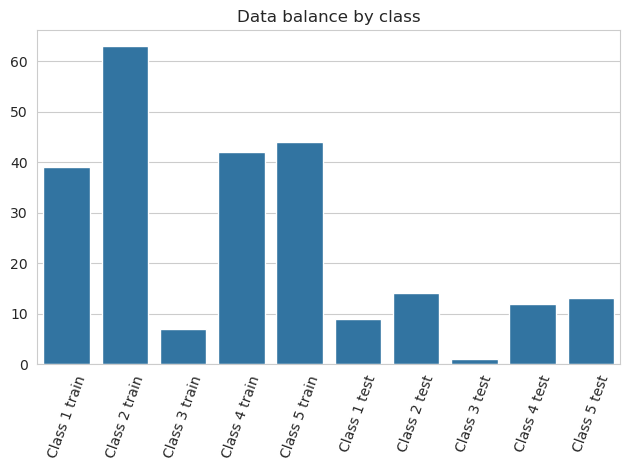

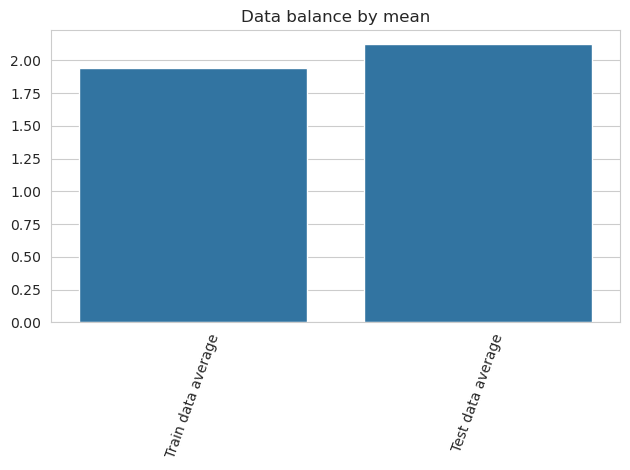

In [18]:
visualize_holdout_balance(train_dl, test_dl)

#### MLP Model 1

In [19]:
EPOCHS = 75
LEARNING_RATE = 0.001

In [20]:
from torch.nn import Module, Linear, ReLU, Softmax, Dropout, Sigmoid
from torch.nn.init import xavier_uniform_, kaiming_uniform_

class MLP_1(Module):
    def __init__(self, n_inputs):
        super(MLP_1, self).__init__()
        self.hidden1 = Linear(n_inputs, 75)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.drop1 = Dropout(0.3)  # Dropout com taxa de 30%
        
        self.hidden2 = Linear(75, 25)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.drop2 = Dropout(0.3)  # Dropout com taxa de 30%
        
        self.hidden3 = Linear(25, 5)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [21]:
model = MLP_1(100)

In [22]:
from torchinfo import summary

print(summary(model, input_size=(len(train_dl.dataset), 100), verbose=0))
model.to(device)

Layer (type:depth-idx)                   Output Shape              Param #
MLP_1                                    [195, 5]                  --
├─Linear: 1-1                            [195, 75]                 7,575
├─ReLU: 1-2                              [195, 75]                 --
├─Linear: 1-3                            [195, 25]                 1,900
├─ReLU: 1-4                              [195, 25]                 --
├─Linear: 1-5                            [195, 5]                  130
├─Softmax: 1-6                           [195, 5]                  --
Total params: 9,605
Trainable params: 9,605
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.87
Input size (MB): 0.08
Forward/backward pass size (MB): 0.16
Params size (MB): 0.04
Estimated Total Size (MB): 0.28


MLP_1(
  (hidden1): Linear(in_features=100, out_features=75, bias=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.3, inplace=False)
  (hidden2): Linear(in_features=75, out_features=25, bias=True)
  (act2): ReLU()
  (drop2): Dropout(p=0.3, inplace=False)
  (hidden3): Linear(in_features=25, out_features=5, bias=True)
  (act3): Softmax(dim=1)
)

In [23]:
from livelossplot import PlotLosses
from torch.nn import CrossEntropyLoss, MSELoss
from torch.optim import SGD, Adam

# Função para treinar o modelo
def train_model(train_dl, val_dl, model):
    # Cria um objeto PlotLosses para visualização em tempo real das métricas
    liveloss = PlotLosses()
    
    # Define a função de perda para problemas de classificação
    criterion = CrossEntropyLoss()
    # Define o otimizador como SGD com taxa de aprendizado e momentum
    optimizer = SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    
    # Loop pelas épocas de treinamento
    for epoch in range(EPOCHS):
        # Dicionário para armazenar as métricas de cada época
        logs = {}
        
        # Coloca o modelo em modo de treinamento
        model.train()
        # Inicializa variáveis acumuladoras para perda e acertos
        running_loss = 0.0
        running_corrects = 0.0
        
        model = model.to(torch.float32)
        # Loop pelos lotes no conjunto de dados de treino
        for inputs, labels in train_dl:
            # Move os dados para o dispositivo especificado (CPU ou GPU)
            inputs = inputs.to(device).float()
            labels = labels.to(device).long()
            
            # Calcula as previsões do modelo para o lote atual
            outputs = model(inputs)
            # Calcula a perda entre as previsões e os rótulos verdadeiros
            loss = criterion(outputs, labels)
            # Zera os gradientes dos parâmetros antes do retropropagação
            optimizer.zero_grad()
            
            # Calcula os gradientes dos parâmetros do modelo
            loss.backward()
            # Atualiza os parâmetros do modelo com base nos gradientes
            optimizer.step()
            
            # Acumula a perda para calcular a média no final
            running_loss += loss.detach() * inputs.size(0)
            # Obtém as previsões mais prováveis para calcular a acurácia
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        
        # Calcula a perda média e a acurácia para a época de treino
        epoch_loss = running_loss / len(train_dl.dataset)
        epoch_acc = running_corrects.float() / len(train_dl.dataset)
        # Adiciona as métricas de treino ao dicionário logs
        logs['loss'] = epoch_loss.item()
        logs['accuracy'] = epoch_acc.item()

        # Coloca o modelo em modo de avaliação (sem ajuste de pesos)
        model.eval()
        # Reinicializa acumuladores para a avaliação
        running_loss = 0.0
        running_corrects = 0.0


        model = model.to(torch.float32)
        # Loop pelos lotes no conjunto de dados de validação
        for inputs, labels in val_dl:
            # Move os dados para o dispositivo especificado (CPU ou GPU)
            inputs = inputs.to(device).float()
            labels = labels.to(device).long()
            
            # Calcula as previsões do modelo para o lote de validação
            outputs = model(inputs)
            # Calcula a perda entre as previsões e os rótulos verdadeiros
            loss = criterion(outputs, labels)
            # Acumula a perda para calcular a média no final
            running_loss += loss.detach() * inputs.size(0)
            # Obtém as previsões mais prováveis para calcular a acurácia
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        
        # Calcula a perda média e a acurácia para a época de validação
        epoch_loss = running_loss / len(val_dl.dataset)
        epoch_acc = running_corrects.float() / len(val_dl.dataset)
        # Adiciona as métricas de validação ao dicionário logs
        logs['val_loss'] = epoch_loss.item()
        logs['val_accuracy'] = epoch_acc.item()   
        
        # Atualiza o gráfico de métricas com os dados de logs
        liveloss.update(logs)
        # Exibe as métricas atualizadas
        liveloss.send()


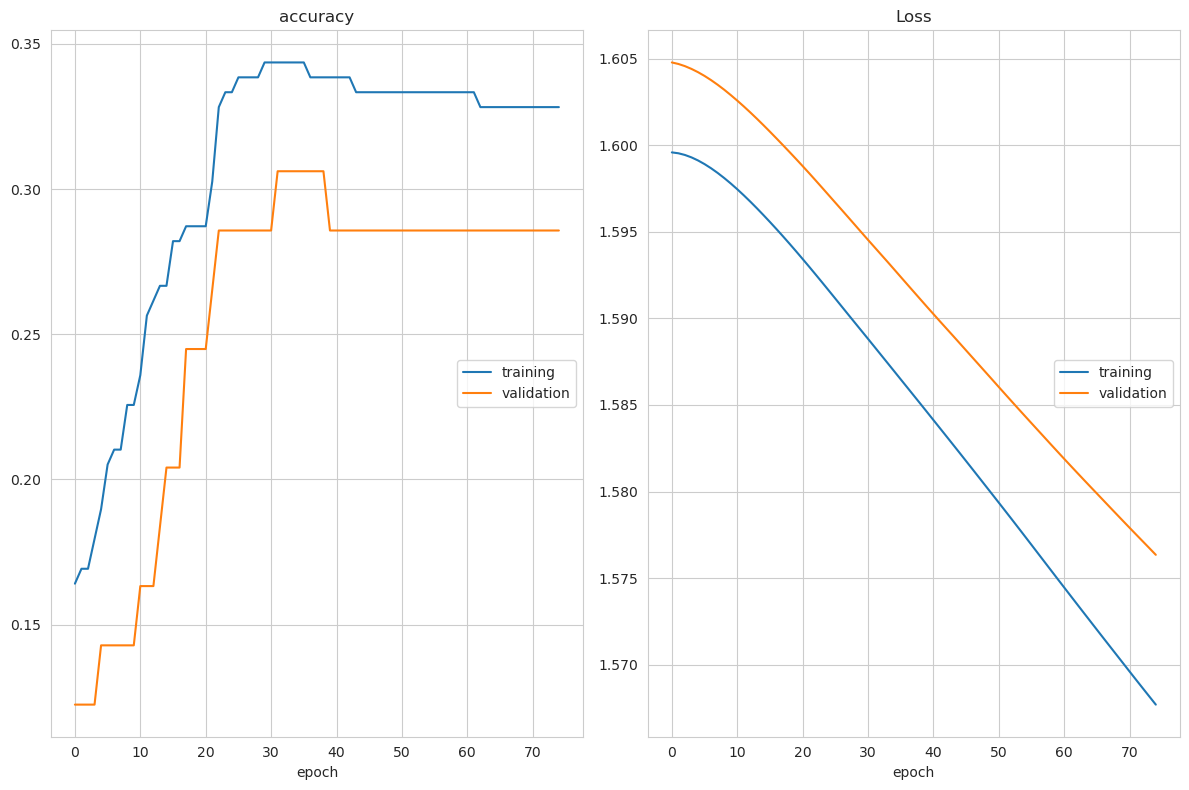

accuracy
	training         	 (min:    0.164, max:    0.344, cur:    0.328)
	validation       	 (min:    0.122, max:    0.306, cur:    0.286)
Loss
	training         	 (min:    1.568, max:    1.600, cur:    1.568)
	validation       	 (min:    1.576, max:    1.605, cur:    1.576)


In [24]:
train_model(train_dl, test_dl, model)

In [25]:
def evaluate_model(test_dl, model):
    predictions = list()
    actual_values = list()
    for i, (inputs, labels) in enumerate(test_dl):
        yprev = model(inputs)
        yprev = yprev.detach().numpy()
        actual = labels.numpy()
        yprev = np.argmax(yprev, axis=1)
        actual = actual.reshape((len(actual), 1))
        yprev = yprev.reshape((len(yprev), 1))
        predictions.append(yprev)
        actual_values.append(actual)
        break
    predictions, actual_values = np.vstack(predictions), np.vstack(actual_values)
    return predictions, actual_values

In [26]:
def display_confusion_matrix(cm):
    plt.figure(figsize = (16,8))
    sns.heatmap(cm, annot=True, xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'],
                yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                annot_kws={"size": 12}, fmt='g', linewidths=.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

In [27]:
predictions, actual_values = evaluate_model(test_dl, model)

In [28]:
success = 0
failure = 0
for r,p in zip(actual_values, predictions):
    print(f'real:{r+1} prediction:{p+1}') 
    if r==p: success+=1  
    else: failure+=1

real:[4] prediction:[2]
real:[2] prediction:[2]
real:[2] prediction:[2]
real:[4] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[4] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[1] prediction:[2]
real:[2] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[3] prediction:[2]
real:[4] prediction:[2]
real:[5] prediction:[2]
real:[4] prediction:[2]
real:[1] prediction:[5]
real:[5] prediction:[2]
real:[1] prediction:[2]
real:[1] prediction:[2]
real:[5] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[2] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[1] prediction:[2]
real:[5] prediction:[2]
real:[2] prediction:[2]
real:[5] prediction:[2]
real:[5] prediction:[2]
real:[4] prediction:[2]
real:[1] prediction:[2]
real:[1] prediction:[5]
real:[2] prediction:[2]
real:[2] prediction:[2]
real:[4] prediction:[2]
real:[4] prediction:[2]
real:[5] prediction:[2]
real:[2] prediction:[2]
real:[4] predict

In [29]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(actual_values, predictions)
print(f'Accuracy: {acc:0.3f}\n')
print(f'success:{success} failure:{failure}')

Accuracy: 0.286

success:14 failure:35


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.30      1.00      0.47        14
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13

    accuracy                           0.29        49
   macro avg       0.06      0.20      0.09        49
weighted avg       0.09      0.29      0.13        49

[[ 0  7  0  0  2]
 [ 0 14  0  0  0]
 [ 0  1  0  0  0]
 [ 0 11  0  0  1]
 [ 0 13  0  0  0]]


/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

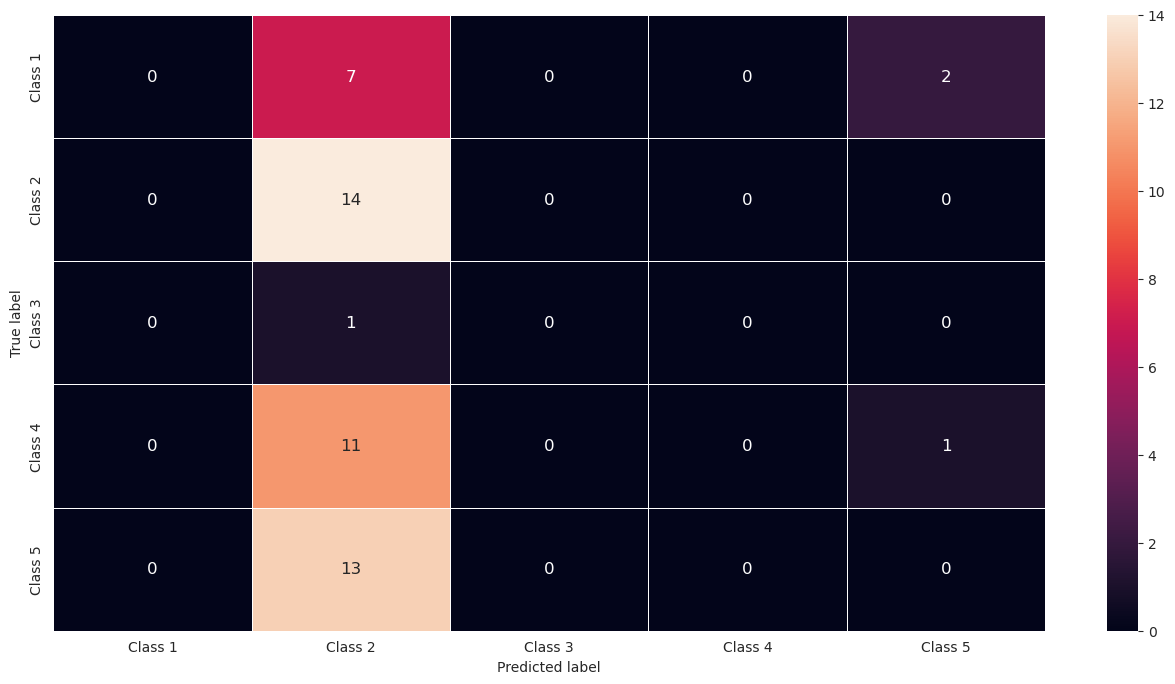

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(actual_values, predictions))
cm = confusion_matrix(actual_values, predictions)
print(cm)
display_confusion_matrix(cm)